<a href="https://colab.research.google.com/github/Sonu-ABC/Machinelearning/blob/master/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations_with_replacement
import random

In [ ]:
#custom train_test_split
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle the data
    indices = np.random.permutation(X.shape[0])
    test_set_size = int(X.shape[0] * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
#function for scaling the data
class StandardScalerFromScratch:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
#function for f1 score calcuation
def precision_score(y_true, y_pred):
    true_positives = sum((y_true == 1) & (y_pred == 1))
    predicted_positives = sum(y_pred == 1)
    if predicted_positives == 0:
        return 0
    return true_positives / predicted_positives

def recall_score(y_true, y_pred):

    true_positives = sum((y_true == 1) & (y_pred == 1))
    actual_positives = sum(y_true == 1)
    if actual_positives == 0:
        return 0
    return true_positives / actual_positives

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)


In [ ]:
#K_nearest_neighbors

class KNN:
  def __init__(self, k=3):
    self.k = k
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
  def euclidean_distance(self, a, b):
    return np.sqrt(np.sum((a - b) ** 2))
  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)
  def _predict(self, x): # Calculate distances between x and all examples in the training set
    distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train] # Sort by distance and return indices of the first k neighbors
    k_indices = np.argsort(distances)[:self.k] # Extract the labels of the k nearest neighbor training samples
    k_nearest_labels = [self.y_train[i] for i in k_indices] # Return the most common class label
    most_common = np.bincount(k_nearest_labels).argmax()
    return  most_common

  def accuracy_score(self, y_true, y_pred):
        assert len(y_true) == len(y_pred), "Length of true and predicted arrays must be the same." # Calculate the number of correct predictions
        correct_predictions = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
        accuracy = correct_predictions / len(y_true)
        return accuracy

multiclass

In [ ]:
train_df = pd.read_csv('/content/multi_classification_train.csv')
test_df = pd.read_csv('/content/multi_classification_test.csv')
train_df = train_df.drop('ID', axis=1)

test_df = test_df.drop('ID', axis=1)
train_df = train_df.dropna()

test_df = test_df.dropna()
X_train=train_df.drop('Class', axis=1)
y_train=train_df['Class']
X_test=test_df

In [ ]:
#Scaling the data
scaler=StandardScalerFromScratch()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0       0.464270  -0.038855   0.808777   0.069424  -0.246486   1.893741   
1      -0.065151   2.601525  -0.304750  -1.290104  -0.464019  -0.810380   
2      -0.477183   1.281673  -1.198507  -1.077906  -0.294588  -1.115401   
3      -1.225995  -0.807158   0.397847   1.688209  -0.077289   1.660641   
4      -1.654135  -0.631944   0.387245  -0.652519   0.417637   0.394783   
...          ...        ...        ...        ...        ...        ...   
11995   1.379397   0.626683  -3.031248  -1.483462  -1.376365   0.569030   
11996  -0.081217  -1.060498   0.287020   0.525468   0.796534  -0.829520   
11997   0.061293   0.011340   1.162292   1.800754   1.046419   1.417177   
11998  -1.014921  -1.073400  -0.982274  -1.455099   1.522881   1.827603   
11999  -0.495553   0.141862  -0.760369   0.344308   0.610837  -1.569387   

       Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0      -0.724706   1.

In [ ]:
X_train_split,X_val,y_train_split,y_val=train_test_split(X_train.values,y_train.values,test_size=0.2,random_state=42)
print(X_train_split)
print(X_train_split.shape)
print(y_val.shape)

[[-0.52448604 -0.2834828  -0.25396412 ... -0.88776311 -0.4140342
  -0.22507042]
 [-1.54802058  1.20566169 -1.15544291 ...  1.21091435  0.46181622
  -1.45957257]
 [-0.11496216 -0.45000979 -0.46918751 ...  0.01939866 -0.31181284
  -1.40675834]
 ...
 [ 0.6918397  -0.79504398  0.22886389 ... -1.13495053 -0.86895405
   1.11209934]
 [ 0.09138272  0.46510259  0.93857965 ... -0.08033067 -1.41334599
   0.13236118]
 [ 1.29413126 -1.60647007  0.05753533 ... -0.55545118 -0.07763162
   0.78286168]]
(38400, 20)
(9600,)


Accuracy with degree 1 is 0.899
Accuracy with degree 2 is 0.876
Accuracy with degree 3 is 0.927
Accuracy with degree 4 is 0.919
Accuracy with degree 5 is 0.928
Accuracy with degree 6 is 0.933
Accuracy with degree 7 is 0.932
Accuracy with degree 8 is 0.934
Accuracy with degree 9 is 0.93
Accuracy with degree 10 is 0.933
Accuracy with degree 11 is 0.932
Accuracy with degree 12 is 0.934
Accuracy with degree 13 is 0.933
Accuracy with degree 14 is 0.936
Accuracy with degree 15 is 0.933
Accuracy with degree 16 is 0.936
Accuracy with degree 17 is 0.933
Accuracy with degree 18 is 0.935
Accuracy with degree 19 is 0.936
Best k: 8
Cross-validation scores: [0.891, 0.8836, 0.9224, 0.9252, 0.9296000000000001, 0.9304, 0.9314000000000002, 0.9343999999999999, 0.9339999999999999, 0.9339999999999999, 0.933, 0.933, 0.932, 0.933, 0.9306000000000001, 0.9318, 0.931, 0.9329999999999998, 0.933]


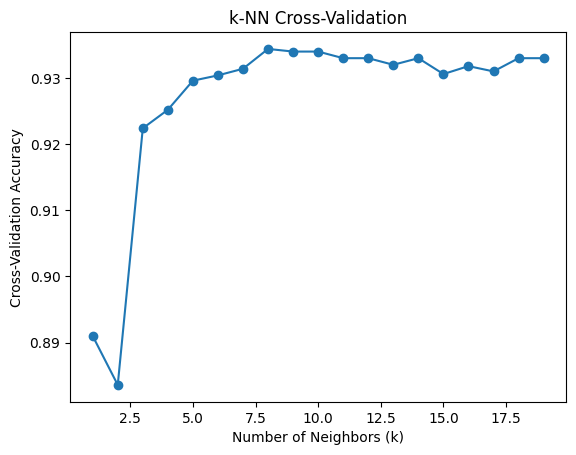

In [ ]:


# To find best k , custom k-fold cross-validation function
def k_fold_cross_validation(X, y, k_values, cv=5):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // cv
    scores = []

    for k in k_values:
        fold_scores = []
        for i in range(cv):
            start = i * fold_size
            end = (i + 1) * fold_size

            X_val = X[indices[start:end]]
            y_val = y[indices[start:end]]

            train_indices = np.concatenate((indices[:start], indices[end:]))
            X_train = X[train_indices]
            y_train = y[train_indices]

            knn = KNN(k)

            knn.fit(X_train, y_train)

            y_pred = knn.predict(X_val)

            accuracy = knn.accuracy_score(y_val, y_pred)

            fold_scores.append(accuracy)

        mean_score = np.mean(fold_scores)
        print("Accuracy with k value ",k,'is',accuracy)
        scores.append(mean_score)

    return scores

k_values = range(1, 20)

cv_scores = k_fold_cross_validation(X_train.values[:5000,:], y_train.values[:5000], k_values, cv=5)

best_k = k_values[np.argmax(cv_scores)]
print(f'Best k: {best_k}')
print(f'Cross-validation scores: {cv_scores}')

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Cross-Validation')
plt.show()


In [ ]:

k = 8  # Number of neighbors
knn = KNN(k)
knn.fit(X_train_split[:8000,:],y_train_split[:8000])

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_val)
print(y_pred)
print(y_val)
# Step 6: Evaluate the model
accuracy = knn.accuracy_score(y_val, y_pred)
print("Accuracy on validation set :", accuracy)

[2 1 2 ... 2 3 1]
[2 1 2 ... 2 0 1]
Accuracy on validation set : 0.9403125


In [ ]:
f1 = f1_score(y_val, np.array(y_pred))
print("F1 Score on validation set : ", f1)

F1 Score on validation set :  0.9600849256900211


In [ ]:
pred_testdata = knn.predict(X_test.values)
print(pred_testdata[:30])

[3 1 1 1 2 1 2 3 2 3 3 2 2 2 1 2 3 4 3 2 1 1 2 1 3 0 1 2 4 3]


binary

In [ ]:
train_df = pd.read_csv('/content/binary_classification_train.csv')
test_df = pd.read_csv('/content/binary_classification_test.csv')
train_df = train_df.drop('ID', axis=1)

test_df = test_df.drop('ID', axis=1)
train_df = train_df.dropna()

test_df = test_df.dropna()
X_train=train_df.drop('Class', axis=1)
y_train=train_df['Class']
X_test=test_df

In [ ]:
#Scaling the data
scaler=StandardScalerFromScratch()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0       2.444277  -0.318443  -0.552754  -0.194656  -0.983553  -0.758054   
1       0.867740  -0.375044   0.831462   0.011387  -0.062052   0.287391   
2      -0.293478  -1.370919   1.031061   1.384421  -1.671796  -0.764459   
3      -1.322990  -0.856703  -0.133142  -0.280699   0.416550  -0.465540   
4      -1.779075  -0.818601  -0.054441  -0.500784  -0.549319  -0.460625   
...          ...        ...        ...        ...        ...        ...   
11995   1.802235   1.010469   0.890545  -0.366096  -0.496127  -0.422100   
11996   0.477304  -2.504430  -0.303791  -0.477253  -0.363558   1.231102   
11997   1.742934  -1.428000   1.053747   0.187187   1.990847   0.060674   
11998   0.749529  -0.291946   0.616354  -0.431166   0.770062   1.502824   
11999   1.595285  -2.238284  -0.099915  -0.114645   0.089070  -0.612122   

       Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0      -0.070025   0.

In [ ]:
X_train_split,X_val,y_train_split,y_val=train_test_split(X_train.values,y_train.values,test_size=0.2,random_state=42)
print(X_train_split)
print(X_train_split.shape)
print(y_val.shape)

[[ 0.15125591  2.86943283 -1.44950062 ...  1.33808763  0.79113441
   0.78726331]
 [-1.0869925  -1.25802606  2.51179824 ... -0.08767592  0.56910249
   1.67160888]
 [-0.59774628  1.50781965 -0.48642895 ...  0.02558487 -0.55835549
   1.12675374]
 ...
 [ 0.92960725  0.2999171  -0.38794585 ... -0.90427929  0.40481508
   0.3853615 ]
 [ 1.35972461  0.45837764  0.92487921 ... -0.26580584  0.63727544
   0.02676439]
 [ 0.88050151 -1.60678446  2.64255596 ...  0.18988409 -1.15896963
   0.09335619]]
(38400, 20)
(9600,)


Accuracy with k value  1 is 0.867
Accuracy with k value  2 is 0.896
Accuracy with k value  3 is 0.913
Accuracy with k value  4 is 0.911
Accuracy with k value  5 is 0.92
Accuracy with k value  6 is 0.92
Accuracy with k value  7 is 0.923
Accuracy with k value  8 is 0.921
Accuracy with k value  9 is 0.926
Accuracy with k value  10 is 0.923
Accuracy with k value  11 is 0.928
Accuracy with k value  12 is 0.923
Accuracy with k value  13 is 0.928
Accuracy with k value  14 is 0.921
Accuracy with k value  15 is 0.925
Accuracy with k value  16 is 0.921
Accuracy with k value  17 is 0.925
Accuracy with k value  18 is 0.923
Accuracy with k value  19 is 0.924
Best k: 13
Cross-validation scores: [0.8734, 0.8907999999999999, 0.9148, 0.9120000000000001, 0.9208000000000001, 0.9164, 0.9226000000000001, 0.9179999999999999, 0.9218, 0.9182, 0.9224, 0.9196, 0.923, 0.9186, 0.922, 0.9174000000000001, 0.922, 0.9192, 0.9221999999999999]


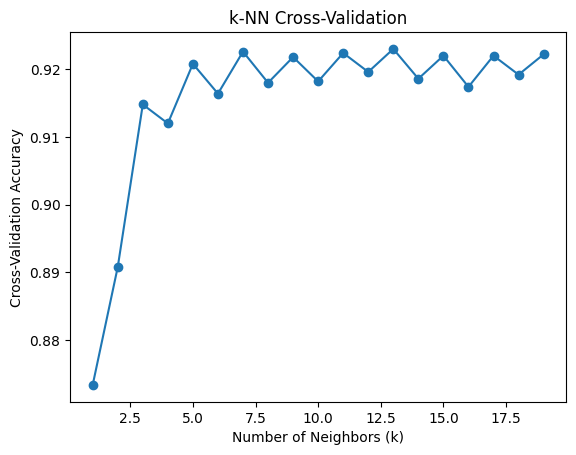

In [ ]:
# To find best k , custom k-fold cross-validation function
def k_fold_cross_validation(X, y, k_values, cv=5):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // cv
    scores = []

    for k in k_values:
        fold_scores = []
        for i in range(cv):
            start = i * fold_size
            end = (i + 1) * fold_size

            X_val = X[indices[start:end]]
            y_val = y[indices[start:end]]

            train_indices = np.concatenate((indices[:start], indices[end:]))
            X_train = X[train_indices]
            y_train = y[train_indices]

            knn = KNN(k)

            knn.fit(X_train, y_train)

            y_pred = knn.predict(X_val)

            accuracy = knn.accuracy_score(y_val, y_pred)

            fold_scores.append(accuracy)

        mean_score = np.mean(fold_scores)
        print("Accuracy with k value ",k,'is',accuracy)
        scores.append(mean_score)

    return scores

k_values = range(1, 20)

cv_scores = k_fold_cross_validation(X_train.values[:5000,:], y_train.values[:5000], k_values, cv=5)

best_k = k_values[np.argmax(cv_scores)]
print(f'Best k: {best_k}')
print(f'Cross-validation scores: {cv_scores}')

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Cross-Validation')
plt.show()

In [ ]:

k =  13 # Number of neighbors
knn = KNN(k)
knn.fit(X_train_split[:8000,:],y_train_split[:8000])

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_val)
print(y_pred)
print(y_val)
# Step 6: Evaluate the model
accuracy = knn.accuracy_score(y_val, y_pred)
print("Accuracy on validation set :", accuracy)

[0 1 0 ... 1 0 1]
[0 1 0 ... 1 0 1]
Accuracy on validation set : 0.9329166666666666


In [ ]:
f1 = f1_score(y_val, np.array(y_pred))
print("F1 Score on validation set : ", f1)

F1 Score on validation set :  0.890289608177172


In [ ]:
pred_testdata = knn.predict(X_test.values)
print(pred_testdata[:30])

[0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0]
